Импортируем все необходимые библиотеки и **немного настроим дефолтное отображение картинок?*

In [12]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv('cardio.csv', index_col='id', sep=';')

Проверим, все ли нормально считалось – посмотрим на первые 5 строк (метод head).

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Для удобства переведем age из дней в года

In [7]:
column = []
for a in df['age']:
    age = a//365
    column.append(age)
df['age'] = column
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


Число строк (пациенты) и столбцов (признаков):

In [8]:
df.shape

(70000, 12)

Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 70000 записей.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


Описание признаков:
Целевая переменная: cardio – признак наличия сердечно-сосудистого заболевания, бинарный (1 – болеет). 

Посмотрим на распределение целевого класса .

In [10]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

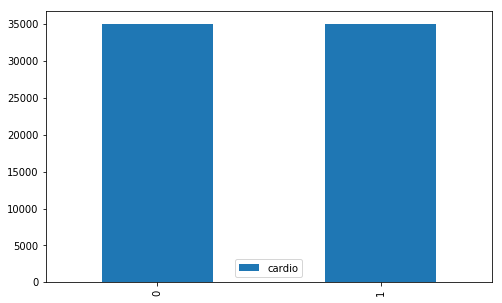

In [15]:
plt = df['cardio'].value_counts().plot(kind='bar', label='cardio')
plt.legend()
#plt.title('Распределение статистики наличия ССЗ') почему то пишет ошибку ??

Выделим следующие группы признаков (среди всех кроме cardio ):

- бинарные: smoke, alco, active, gender?
- категориальные: cholesterol, gluc
- порядковые: id
- количественные: age, heiht, weight, ap_hi, ap_lo

Посмотрим на корреляции количественных признаков. 

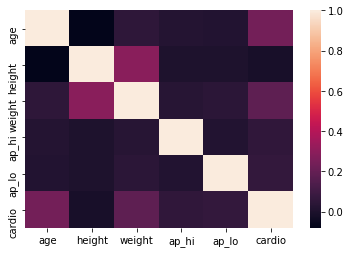

In [50]:
corr_matrix = df.drop(['smoke', 'alco', 'active', 'gender','cholesterol','gluc'], axis=1).corr()
sns.heatmap(corr_matrix)

Теперь посмотрим на распределения всех интересующих нас количественных признаков. 

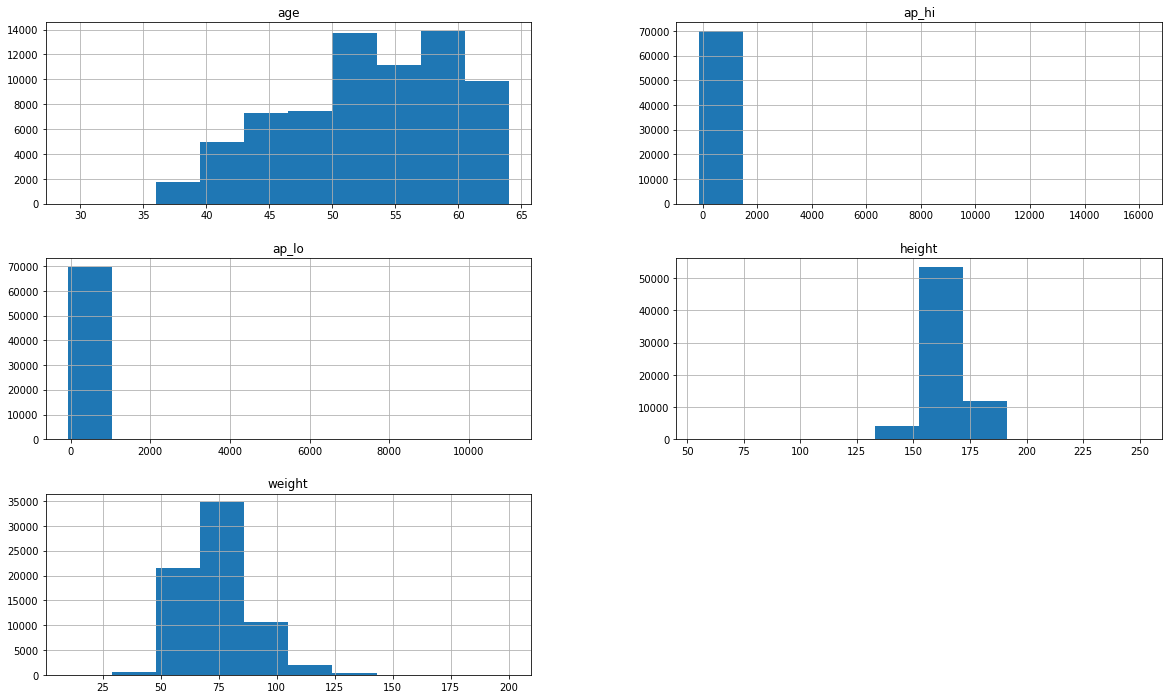

In [20]:
features = list(set(df.columns) - set(['smoke', 'alco', 'active', 'gender','cholesterol','gluc','cardio']))

df[features].hist(figsize=(20,12))

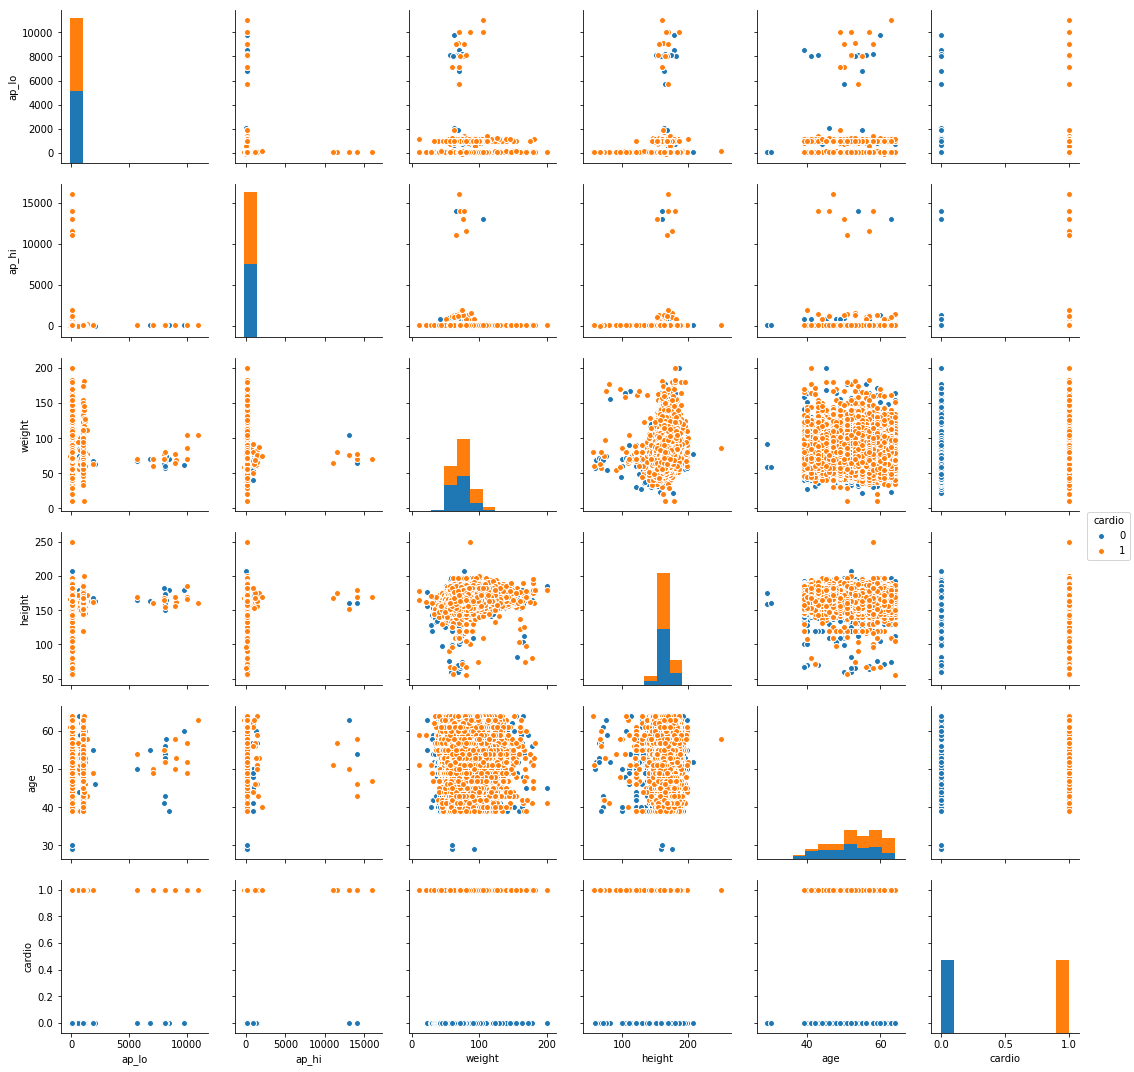

In [21]:
sns.pairplot(df[features + ['cardio']], hue='cardio')

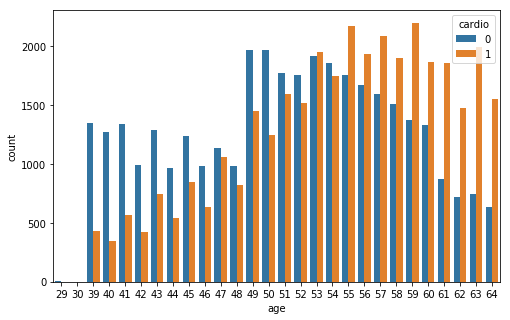

In [25]:
sns.countplot(x='age', hue='cardio', data=df);

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые
X = df.drop(['cardio', 'gender'], axis=1)
X['age'] = pd.factorize(X['age'])[0]
X['ap_hi'] = pd.factorize(X['ap_hi'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 45min 45s, sys: 2min 37s, total: 48min 23s
Wall time: 46min 15s


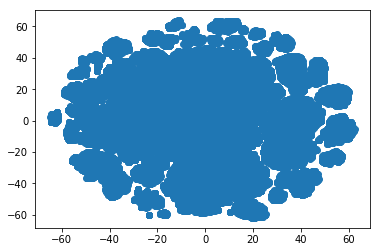

In [47]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

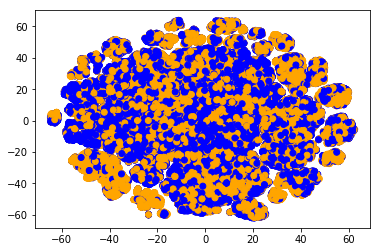

In [48]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['cardio'].map({0: 'blue', 1: 'orange'}));

In [45]:
# Преамбула
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
#import matplotlib as plt
# Вывод на экран текущей версии библиотеки matplotlib
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 2.0.2


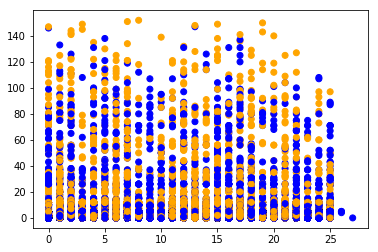

In [49]:
plt.scatter(X['age'], X['ap_hi'], c=df['cardio'].map({0: 'blue', 1: 'orange'}))